In [16]:
from heapq import merge
import pandas as pd
import numpy as np

covid_data = pd.read_csv('data/covid_data.csv')
display(covid_data.head())

,date,province/state,country,confirmed,deaths,recovered
0,01/22/2020,Anhui,China,1.0,0.0,0.0
1,01/22/2020,Beijing,China,14.0,0.0,0.0
2,01/22/2020,Chongqing,China,6.0,0.0,0.0
3,01/22/2020,Fujian,China,1.0,0.0,0.0
4,01/22/2020,Gansu,China,0.0,0.0,0.0


In [17]:
vaccinations_data = pd.read_csv('data/country_vaccinations.csv')
vaccinations_data = vaccinations_data[
    ['country', 'date', 'total_vaccinations', 
     'people_vaccinated', 'people_vaccinated_per_hundred',
     'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred',
     'daily_vaccinations', 'vaccines']
]

In [18]:
covid_data = covid_data.groupby(
    ['date', 'country'], 
    as_index=False
)[['confirmed', 'deaths', 'recovered']].sum()

covid_data

,date,country,confirmed,deaths,recovered
0,01/01/2021,Afghanistan,51526.0,2191.0,41727.0
1,01/01/2021,Albania,58316.0,1181.0,33634.0
2,01/01/2021,Algeria,99897.0,2762.0,67395.0
3,01/01/2021,Andorra,8117.0,84.0,7463.0
4,01/01/2021,Angola,17568.0,405.0,11146.0
...,...,...,...,...,...
86780,12/31/2020,Vietnam,1465.0,35.0,1325.0
86781,12/31/2020,West Bank and Gaza,138004.0,1400.0,117183.0
86782,12/31/2020,Yemen,2099.0,610.0,1394.0
86783,12/31/2020,Zambia,20725.0,388.0,18660.0


In [19]:
covid_data['date'] = pd.to_datetime(covid_data['date'])
date_min = covid_data['date'].min()
date_max = covid_data['date'].max()
display(date_min,date_max)

Timestamp('2020-01-22 00:00:00')

Timestamp('2021-05-29 00:00:00')

In [20]:
covid_data['active'] = covid_data['confirmed'] - covid_data['deaths'] - covid_data['recovered']
covid_data

,date,country,confirmed,deaths,recovered,active
0,2021-01-01,Afghanistan,51526.0,2191.0,41727.0,7608.0
1,2021-01-01,Albania,58316.0,1181.0,33634.0,23501.0
2,2021-01-01,Algeria,99897.0,2762.0,67395.0,29740.0
3,2021-01-01,Andorra,8117.0,84.0,7463.0,570.0
4,2021-01-01,Angola,17568.0,405.0,11146.0,6017.0
...,...,...,...,...,...,...
86780,2020-12-31,Vietnam,1465.0,35.0,1325.0,105.0
86781,2020-12-31,West Bank and Gaza,138004.0,1400.0,117183.0,19421.0
86782,2020-12-31,Yemen,2099.0,610.0,1394.0,95.0
86783,2020-12-31,Zambia,20725.0,388.0,18660.0,1677.0


In [21]:
covid_data = covid_data.sort_values(by=['country', 'date']) 
covid_data['daily_confirmed'] = covid_data.groupby('country')['confirmed'].diff()
covid_data['daily_deaths'] = covid_data.groupby('country')['deaths'].diff()
covid_data['daily_recovered'] = covid_data.groupby('country')['recovered'].diff()
covid_data

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered
11337,2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,NaN,NaN,NaN
11570,2020-02-25,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
11807,2020-02-26,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
12051,2020-02-27,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
12299,2020-02-28,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
15933,2020-03-12,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16595,2020-03-14,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16938,2020-03-15,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17290,2020-03-16,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
vaccinations_data['date'] = pd.to_datetime(vaccinations_data['date'])

covid_df = covid_data.merge(
    vaccinations_data,
    on=['date', 'country'],
    how='left')
covid_df



covid_df['death_rate'] = covid_df['deaths']/covid_df['confirmed']*100
covid_df['recover_rate'] = covid_df['recovered']/covid_df['confirmed']*100

covid_df.to_csv('data/covid_df.csv')


In [23]:

#Задание 3.4 Какова максимальная летальность в США 
covid_df_US=covid_df[covid_df['country']=='United States']
display(round(covid_df_US['death_rate'].max(),2))

#Задание 3.5 Чему равен средний процент выздоровевших в России (Russia)?
covid_df_US=covid_df[covid_df['country']=='Russia']
display(round(covid_df_US['recover_rate'].mean(),2))

7.19

67.06

Постройте график из задания 4.4. В какой стране число вакцинированных наименьшее?

country
Central African Republic      667.0
Solomon Islands              3479.0
Guinea-Bissau                5889.0
South Sudan                  8606.0
Benin                       12934.0
Name: total_vaccinations, dtype: float64

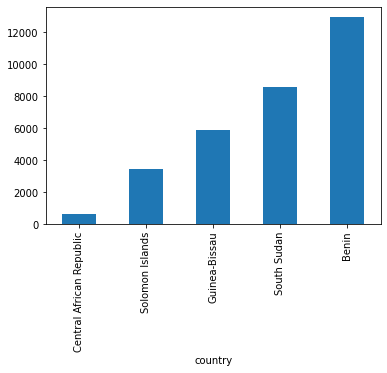

In [24]:
grouped_country = covid_df.groupby(['country'])['total_vaccinations'].last().nsmallest(5).plot(kind='bar');
display(covid_df.groupby(['country'])['total_vaccinations'].last().nsmallest())